In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from sklearn.model_selection import train_test_split


/home/grigoriy/anaconda3/envs/tf1.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/grigoriy/anaconda3/envs/tf1.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/grigoriy/anaconda3/envs/tf1.5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/grigoriy/anaconda3/envs/tf1.5/lib/pyt

1.5.0


## Линейная модель

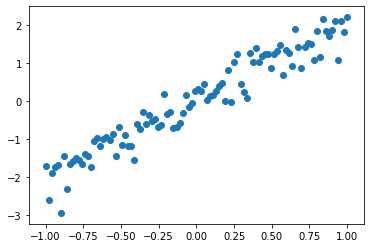

In [2]:
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

W:2.014, b:0.019


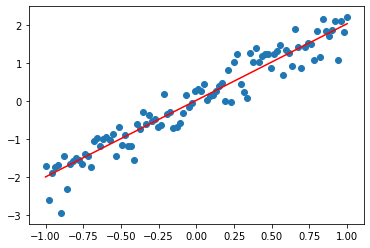

In [13]:
learning_rate = 0.01
training_epochs = 100

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w, b):
    return  tf.multiply(X, w) + b

w = tf.Variable(0.0, name = 'weights')
b = tf.Variable(0.0, name = 'bias')

y_model = model(X, w, b)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y:y})
    # Получаем окончательные значения W и b      
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('W:{:.3f}, b:{:.3f}'.format(w_val, b_val))
    
plt.scatter(x_train, y_train)
y_learned = x_train * w_val + b_val
plt.plot(x_train, y_learned, 'r')
plt.show()



## Полиномиальная модель

In [35]:
tf.reset_default_graph()

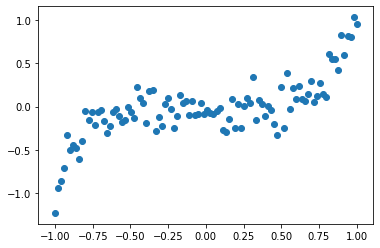

In [36]:
x_train = np.linspace(-1, 1, 100)
y_train = np.power(x_train, 5) + np.random.randn(*x_train.shape) * 0.15

plt.scatter(x_train, y_train)
plt.show()

W:[-0.05490784 -0.2599338   0.18474245  1.1446099  -0.07537779]


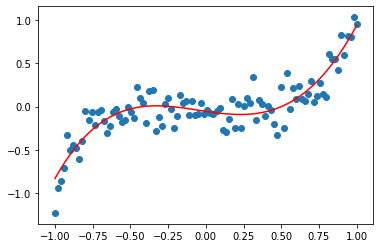

In [38]:
learning_rate = 0.01
training_epochs = 100
num_coeffs = 5

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    parts = []
    for i in range(num_coeffs):
        part = tf.multiply(w[i], tf.pow(X, i))
        parts.append(part)
    return tf.add_n(parts) #https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/math/add_n

w = tf.Variable([0.] * num_coeffs, name='weights')
y_model = model(X, w)

cost = tf.square(Y - y_model)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y:y})
    # Получаем окончательные значения W и b      
    w_val = sess.run(w)
    print('W:{}'.format(w_val))
    
plt.scatter(x_train, y_train)
y_learned = sum(w_val[i] * np.power(x_train, i) for i in range(num_coeffs))
plt.plot(x_train, y_learned, 'r')
plt.show()


## Регуляризация

In [11]:
tf.reset_default_graph()

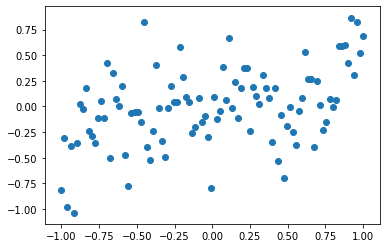

In [2]:
x = np.linspace(-1, 1, 100)
y = np.power(x, 9) + np.random.randn(*x.shape) * 0.3 #Используем полином 9 степени чтобы создать повод для регуляризации

plt.scatter(x, y)
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

num_coeffs = 9
learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                     tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
              2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)

reg lambda 0.0
final cost 0.029463492
reg lambda 0.010101010101010102
final cost 0.027119087
reg lambda 0.020202020202020204
final cost 0.026295934
reg lambda 0.030303030303030304
final cost 0.026030688
reg lambda 0.04040404040404041
final cost 0.025971351
reg lambda 0.05050505050505051
final cost 0.025982073
reg lambda 0.06060606060606061
final cost 0.02600842
reg lambda 0.07070707070707072
final cost 0.026028775
reg lambda 0.08080808080808081
final cost 0.026035486
reg lambda 0.09090909090909091
final cost 0.026027033
reg lambda 0.10101010101010102
final cost 0.02600454
reg lambda 0.11111111111111112
final cost 0.025970135
reg lambda 0.12121212121212122
final cost 0.025926195
reg lambda 0.13131313131313133
final cost 0.02587497
reg lambda 0.14141414141414144
final cost 0.02581847
reg lambda 0.15151515151515152
final cost 0.025758386
reg lambda 0.16161616161616163
final cost 0.025696106
reg lambda 0.17171717171717174
final cost 0.025632761
reg lambda 0.18181818181818182
final cost 0.0